# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [6]:
import pandas as pd
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns



In [7]:

# URL de la página
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Hacer la solicitud con un User-Agent válido para evitar restricciones
headers = {
    "User-Agent": (
        "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 "
        "(KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    )
}
response = requests.get(url, headers=headers)
time.sleep(2)  # Agrega un pequeño retraso para no sobrecargar el servidor

# Verificar si la respuesta es exitosa
if response.status_code == 200:
    html_data = response.text
else:
    print(f"Error al acceder a la página: {response.status_code}")
    exit()

# Analizar el contenido HTML con BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Buscar todas las tablas en la página
tables = soup.find_all("table")

# Identificar la tabla que contiene "Tesla Quarterly Revenue"
target_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in str(table):
        target_table = table
        break

if not target_table:
    print("No se encontró la tabla 'Tesla Quarterly Revenue'.")
    exit()

# Extraer datos de la tabla
rows = target_table.find_all("tr")
data = []

for row in rows:
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    if cols:  # Evitar filas vacías
        data.append(cols)

# Crear el DataFrame
columns = ["Date", "Revenue"]  # Asegurar nombres adecuados de columnas
df = pd.DataFrame(data, columns=columns)

# Limpiar y convertir los datos
df["Revenue"] = df["Revenue"].replace({"\$": "", ",": ""}, regex=True)  # Eliminar símbolos de dólar y comas
df["Revenue"] = pd.to_numeric(df["Revenue"], errors="coerce")  # Convertir a float; errores se convierten a NaN
df = df.dropna(subset=["Revenue"])  # Eliminar filas con valores NaN en Revenue

# Mostrar el DataFrame final
df.head()


,Date,Revenue
0,2024-09-30,25182.0
1,2024-06-30,25500.0
2,2024-03-31,21301.0
3,2023-12-31,25167.0
4,2023-09-30,23350.0


In [13]:
tesla_revenue = df[df["Revenue"] != ""]
tesla_revenue.head()

,Date,Revenue
0,2024-09-30,25182.0
1,2024-06-30,25500.0
2,2024-03-31,21301.0
3,2023-12-31,25167.0
4,2023-09-30,23350.0


ALMACENANDO DATOS EN SQLITE

In [8]:
import sqlite3

connection = sqlite3.connect("Tesla.db")
connection

In [9]:
tesla_tuples = list(df.to_records(index = False))
tesla_tuples[:5]

[np.record(('2024-09-30', 25182.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('2024-06-30', 25500.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('2024-03-31', 21301.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('2023-12-31', 25167.0), dtype=[('Date', 'O'), ('Revenue', '<f8')]),
 np.record(('2023-09-30', 23350.0), dtype=[('Date', 'O'), ('Revenue', '<f8')])]

In [13]:
for row in cursor.execute("SELECT * FROM revenue"):
    print(row)

('2024-09-30', '25182')
('2024-06-30', '25500')
('2024-03-31', '21301')
('2023-12-31', '25167')
('2023-09-30', '23350')
('2023-06-30', '24927')
('2023-03-31', '23329')
('2022-12-31', '24318')
('2022-09-30', '21454')
('2022-06-30', '16934')
('2022-03-31', '18756')
('2021-12-31', '17719')
('2021-09-30', '13757')
('2021-06-30', '11958')
('2021-03-31', '10389')
('2020-12-31', '10744')
('2020-09-30', '8771')
('2020-06-30', '6036')
('2020-03-31', '5985')
('2019-12-31', '7384')
('2019-09-30', '6303')
('2019-06-30', '6350')
('2019-03-31', '4541')
('2018-12-31', '7226')
('2018-09-30', '6824')
('2018-06-30', '4002')
('2018-03-31', '3409')
('2017-12-31', '3288')
('2017-09-30', '2985')
('2017-06-30', '2790')
('2017-03-31', '2696')
('2016-12-31', '2285')
('2016-09-30', '2298')
('2016-06-30', '1270')
('2016-03-31', '1147')
('2015-12-31', '1214')
('2015-09-30', '937')
('2015-06-30', '955')
('2015-03-31', '940')
('2014-12-31', '957')
('2014-09-30', '852')
('2014-06-30', '769')
('2014-03-31', '621')
('

INGRESOS POR AÑO

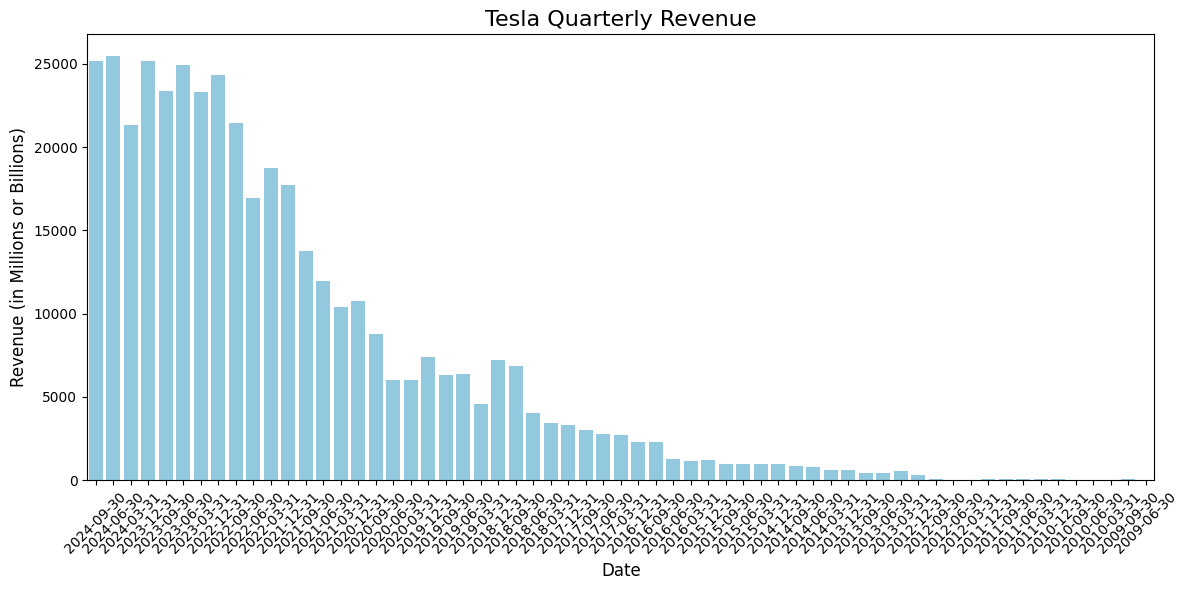

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna "Date" a formato datetime
df["Date"] = pd.to_datetime(df["Date"])

# Crear una columna de año para análisis anual
df["Year"] = df["Date"].dt.year

# 1. Gráfica de barras: Ingresos trimestrales
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Date", y="Revenue", color="skyblue")
plt.title("Tesla Quarterly Revenue", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Revenue (in Millions or Billions)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





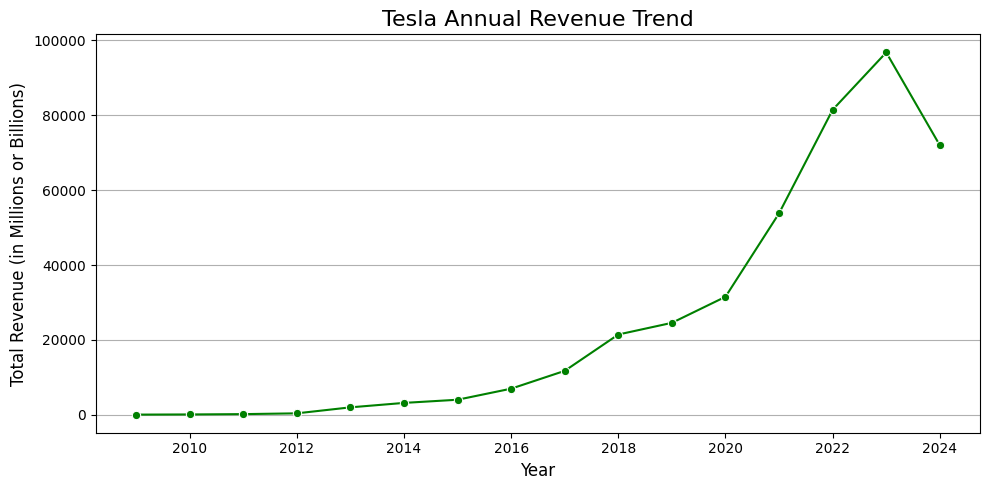

In [23]:
# 2. Gráfica de líneas: Tendencia anual acumulada
annual_revenue = df.groupby("Year")["Revenue"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=annual_revenue, x="Year", y="Revenue", marker="o", color="green")
plt.title("Tesla Annual Revenue Trend", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Revenue (in Millions or Billions)", fontsize=12)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


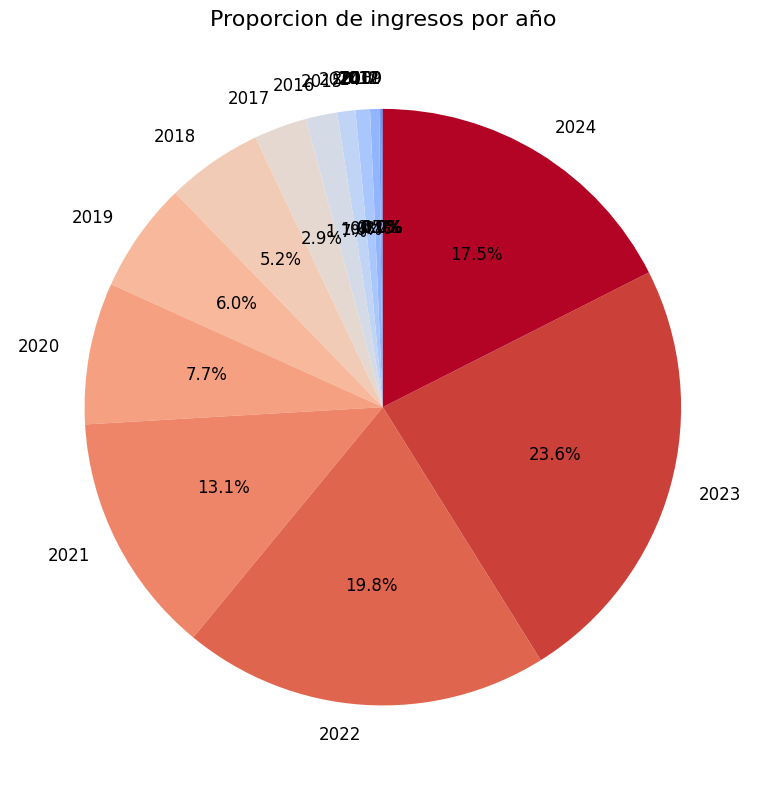

In [24]:
# 3. Gráfica de pastel: Proporción de ingresos por año
plt.figure(figsize=(8, 8))
revenue_by_year = annual_revenue.set_index("Year")
revenue_by_year["Revenue"].plot.pie(
    autopct="%.1f%%", startangle=90, cmap="coolwarm", fontsize=12
)
plt.title("Proporcion de ingresos por año", fontsize=16)
plt.ylabel("")  # Ocultar la etiqueta del eje Y
plt.tight_layout()
plt.show()